In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

In [2]:
df = pd.read_csv("wine.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [3]:
X = df.iloc[   :  , 0 : 12 ]
y = df.iloc[ : ,  12 ]

print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape,"  ", X_test.shape)
print(y_train.shape, y_test.shape)

(5197, 12)    (1300, 12)
(5197,) (1300,)


In [5]:
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train,
                 y_train,
                 epochs=50,
                 batch_size=500,
                 validation_split=0.25) # 0.8 * 0.25 = 0.2

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7557 - loss: 1.5418 - val_accuracy: 0.7546 - val_loss: 0.8425
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7362 - loss: 0.6990 - val_accuracy: 0.8192 - val_loss: 0.5016
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8572 - loss: 0.4054 - val_accuracy: 0.8838 - val_loss: 0.3357
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9030 - loss: 0.2949 - val_accuracy: 0.9085 - val_loss: 0.2728
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9166 - loss: 0.2534 - val_accuracy: 0.9123 - val_loss: 0.2438
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9279 - loss: 0.2205 - val_accuracy: 0.9215 - val_loss: 0.2302
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9281 - loss: 0.2129 - val_accuracy: 0.9246 - val_loss: 0.2234
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9277 - loss: 0.2146 - val_accuracy: 0.9262 - val_loss: 0.2187


In [ ]:
df.sample(frac=0.1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
2190,7.3,0.20,0.37,1.2,0.037,48.0,119.0,0.99200,3.32,0.49,10.9,6,0
5800,6.7,0.41,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,6,0
3504,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,6,0
3479,7.7,0.30,0.42,14.3,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,5,0
5805,5.9,0.32,0.20,14.4,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,6.7,0.33,0.34,6.6,0.067,35.0,156.0,0.99542,3.11,0.48,9.3,6,0
5125,8.9,0.27,0.28,0.8,0.024,29.0,128.0,0.98984,3.01,0.35,12.4,6,0
4553,6.4,0.29,0.30,2.9,0.036,25.0,79.0,0.99037,3.29,0.60,12.4,7,0
3431,7.7,0.44,0.24,11.2,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,7,0


In [ ]:
hist.history

{'accuracy': [0.760071873664856,
  0.7415961027145386,
  0.8765717148780823,
  0.9078778624534607,
  0.9207082390785217,
  0.9258403778076172,
  0.9276366233825684,
  0.9296895265579224,
  0.9317423701286316,
  0.9325121641159058,
  0.9350782632827759,
  0.9353348612785339,
  0.935591459274292,
  0.9363613128662109,
  0.9371311068534851,
  0.936874508857727,
  0.937644362449646,
  0.9373877048492432,
  0.937644362449646,
  0.9381575584411621,
  0.937644362449646,
  0.9384141564369202,
  0.9389273524284363,
  0.9386707544326782,
  0.9396972060203552,
  0.9402104020118713,
  0.9399538040161133,
  0.9394406080245972,
  0.9407236576080322,
  0.9407236576080322,
  0.9417500495910645,
  0.9422633051872253,
  0.9422633051872253,
  0.9420066475868225,
  0.9425199031829834,
  0.9445727467536926,
  0.9461123943328857,
  0.9440595507621765,
  0.9450859427452087,
  0.9466255903244019,
  0.9468821883201599,
  0.9448293447494507,
  0.9461123943328857,
  0.949191689491272,
  0.9489350914955139,
  0.9

In [ ]:
model.evaluate(X_test, y_test)[1]

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9588 - loss: 0.1205


0.9523077011108398

In [6]:
modelpath = './model/all/{epoch:02d}-{val_accuracy:.4f}.keras'

modelpath


'./model/all/{epoch:02d}-{val_accuracy:.4f}.keras'

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

ckpoint = ModelCheckpoint(filepath=modelpath, verbose=1)
#monitor='val_loss' , val_accuracy, loss, accuracy
ckpoint

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train,
                 y_train,
                 epochs=50,
                 batch_size=500,
                 validation_split=0.25,
                 verbose=0,
                 callbacks=[ckpoint]  )


Epoch 1: saving model to ./model/all/01-0.1615.keras

Epoch 2: saving model to ./model/all/02-0.7562.keras

Epoch 3: saving model to ./model/all/03-0.7569.keras

Epoch 4: saving model to ./model/all/04-0.7569.keras

Epoch 5: saving model to ./model/all/05-0.7715.keras

Epoch 6: saving model to ./model/all/06-0.8185.keras

Epoch 7: saving model to ./model/all/07-0.8562.keras

Epoch 8: saving model to ./model/all/08-0.8685.keras

Epoch 9: saving model to ./model/all/09-0.8946.keras

Epoch 10: saving model to ./model/all/10-0.9200.keras

Epoch 11: saving model to ./model/all/11-0.9315.keras

Epoch 12: saving model to ./model/all/12-0.9354.keras

Epoch 13: saving model to ./model/all/13-0.9362.keras

Epoch 14: saving model to ./model/all/14-0.9362.keras

Epoch 15: saving model to ./model/all/15-0.9362.keras

Epoch 16: saving model to ./model/all/16-0.9354.keras

Epoch 17: saving model to ./model/all/17-0.9338.keras

Epoch 18: saving model to ./model/all/18-0.9377.keras

Epoch 19: saving m

In [9]:
print("Test 정확도: ", model.evaluate(X_test, y_test)[1] * 100)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1701
Test 정확도:  93.9230740070343


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train,
                 y_train,
                 epochs=2000,
                 batch_size=500,
                 validation_split=0.25,
                 verbose=0,
                 )

In [11]:
hist

In [13]:
hist_df = pd.DataFrame(hist.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.949961,0.140830,0.950769,0.142877
1,0.948935,0.138242,0.952308,0.138679
2,0.950731,0.135574,0.951538,0.137534
3,0.950731,0.135682,0.953846,0.137302
4,0.951501,0.134902,0.953846,0.136043
...,...,...,...,...
1995,0.988966,0.032431,0.986154,0.070917
1996,0.988966,0.032060,0.984615,0.068989
1997,0.989479,0.031835,0.984615,0.067793
1998,0.990249,0.029225,0.986154,0.066357


In [14]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']



In [15]:
import matplotlib.pyplot as plt
import numpy as np

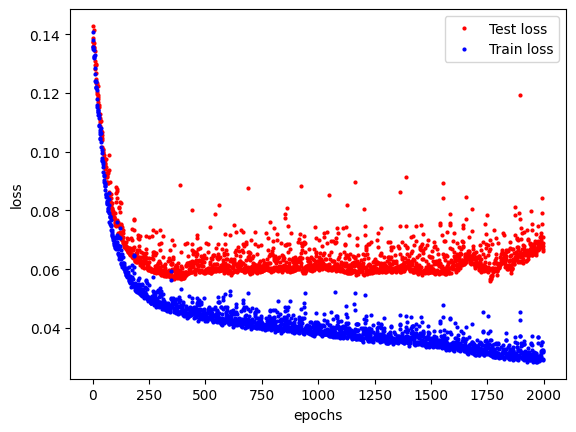

In [22]:
x_len = np.arange(len(hist_df))
plt.plot(x_len, y_vloss, "o", markersize=2, c="r", label="Test loss")
plt.plot(x_len, y_loss, "o", markersize=2, c="b", label="Train loss")

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
stop = EarlyStopping(monitor='val_loss', patience=20)
stop

In [26]:
modelpath = './data/model/bestmodel.keras'
ckpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
ckpoint

In [27]:
hist = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, callbacks=[stop, ckpoint])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9911 - loss: 0.0318 - val_accuracy: 0.9885 - val_loss: 0.0664
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9889 - loss: 0.0310 - val_accuracy: 0.9877 - val_loss: 0.0664
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9831 - val_loss: 0.0669
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.9823 - val_loss: 0.0721
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9880 - loss: 0.0340 - val_accuracy: 0.9854 - val_loss: 0.0668
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9902 - loss: 0.0299 - val_accuracy: 0.9869 - val_loss: 0.0666
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9898 - loss: 0.0303 - val_accuracy: 0.9862 - val_loss: 0.0667
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9907 - loss: 0.0272 - val_accuracy: 0.9877 - v

In [28]:
pd.DataFrame(hist.history)

,accuracy,loss,val_accuracy,val_loss
0,0.991019,0.029609,0.988462,0.066445
1,0.989992,0.029611,0.987692,0.066358
2,0.990762,0.030001,0.983077,0.066893
3,0.991019,0.029986,0.982308,0.072109
4,0.989736,0.031329,0.985385,0.066814
5,0.990506,0.029454,0.986923,0.066566
6,0.989736,0.029027,0.986154,0.066694
7,0.990249,0.028274,0.987692,0.069666
8,0.989992,0.029503,0.986923,0.067728
9,0.990506,0.029185,0.987692,0.068597


In [29]:
model.evaluate(X_test, y_test)[1] * 100

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0539


98.6923098564148